# LeNet
This program includes: 
    - A simple implementation of LeNet (LeCun et al., 1998)
    - A modified version of LeNet with trial/error based improvements

References: 
    - Dive Into Deep Learning, A. Zhang et al
    - Build a Simple Neural Network Using PyTorch, Ramesh Paudel


In [42]:
import torch
from torch import nn
from torchvision.datasets import MNIST
from torchvision import transforms
from PIL import Image
import numpy as np
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [43]:
train_dataset = MNIST(root="./", train=True, download=True, transform=transforms.ToTensor())
test_dataset = MNIST(root="./", train=False, download=True, transform=transforms.ToTensor())

In [44]:
train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=True)

In [45]:
model_original = nn.Sequential(
    nn.LazyConv2d(6, kernel_size=5, padding=2), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2), 
    nn.LazyConv2d(16, kernel_size=5), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Flatten(),
    nn.LazyLinear(120), nn.Sigmoid(),
    nn.LazyLinear(84), nn.Sigmoid(),
    nn.LazyLinear(10)
    )
print(model_original)

Sequential(
  (0): LazyConv2d(0, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (1): Sigmoid()
  (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (3): LazyConv2d(0, 16, kernel_size=(5, 5), stride=(1, 1))
  (4): Sigmoid()
  (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): LazyLinear(in_features=0, out_features=120, bias=True)
  (8): Sigmoid()
  (9): LazyLinear(in_features=0, out_features=84, bias=True)
  (10): Sigmoid()
  (11): LazyLinear(in_features=0, out_features=10, bias=True)
)


c:\Users\mercu\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\lazy.py:178: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [46]:
model_new = nn.Sequential(
    nn.LazyConv2d(6, kernel_size=5, padding=2), nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2), 
    nn.LazyConv2d(16, kernel_size=5), nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Flatten(),
    nn.LazyLinear(120), nn.ReLU(),
    nn.LazyLinear(84), nn.ReLU(),
    nn.LazyLinear(10)
    )
print(model_original)

Sequential(
  (0): LazyConv2d(0, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (1): Sigmoid()
  (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (3): LazyConv2d(0, 16, kernel_size=(5, 5), stride=(1, 1))
  (4): Sigmoid()
  (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): LazyLinear(in_features=0, out_features=120, bias=True)
  (8): Sigmoid()
  (9): LazyLinear(in_features=0, out_features=84, bias=True)
  (10): Sigmoid()
  (11): LazyLinear(in_features=0, out_features=10, bias=True)
)


In [47]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_original.parameters())
optimizer_new = torch.optim.Adam(model_new.parameters())

In [48]:
print("Training original LeNet.")
losses = []
num_epochs = 1000
for epoch in range(num_epochs):
    print(f"{epoch*100/num_epochs}% Complete", end="\r")
    train_features, train_labels = next(iter(train_dataloader))
    predictions = model_original(train_features)
    cur_loss = loss_function(predictions, train_labels)
    losses.append(cur_loss.item())

    model_original.zero_grad()
    cur_loss.backward()

    optimizer.step()
print(f"100% Complete", end="\n")

Training original LeNet.
100% Completee


In [56]:
print("Training modified LeNet.")
losses_new = []
for epoch in range(num_epochs):
    print(f"{epoch*100/num_epochs}% Complete", end="\r")
    train_features_new, train_labels_new = next(iter(train_dataloader))
    predictions_new = model_new(train_features_new)
    cur_loss = loss_function(predictions_new, train_labels_new)
    losses_new.append(cur_loss.item())

    model_new.zero_grad()
    cur_loss.backward()

    optimizer_new.step()
print(f"100% Complete", end="\n")

Training modified LeNet.
100% Completee


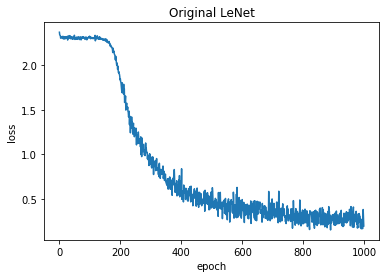

In [57]:
plt.plot(losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title("Original LeNet")
plt.show()

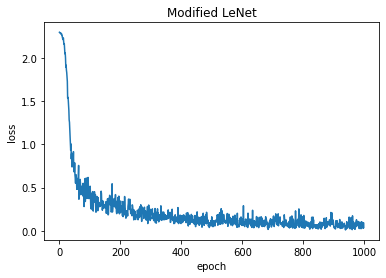

In [58]:
plt.plot(losses_new)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title("Modified LeNet")
plt.show()

In [59]:
predictions = []
y_test = []

model_original.eval()
with torch.no_grad():
    for cur_features, cur_labels in test_dataloader:
        y_test.append(cur_labels.numpy())
        prediction_scores = model_original(cur_features)
        _, cur_predictions = torch.max(prediction_scores.data, 1)
        predictions.append(cur_predictions.item())

In [60]:
predictions_new = []
y_test_new = []

model_new.eval()
with torch.no_grad():
    for cur_features, cur_labels in test_dataloader:
        y_test_new.append(cur_labels.numpy())
        prediction_scores = model_new(cur_features)
        _, cur_predictions = torch.max(prediction_scores.data, 1)
        predictions_new.append(cur_predictions.item())

In [61]:
y_test_np = np.array(y_test).reshape(-1,).astype(int)
predictions = np.array(predictions)
print(f"Original LeNet: {sum(y_test_np==predictions)*100/y_test_np.shape[0]}% accuracy")


Original LeNet: 92.37% accuracy


In [62]:
y_test_np_new = np.array(y_test_new).reshape(-1,).astype(int)
predictions_new = np.array(predictions_new)
print(f"Modified LeNet: {sum(y_test_np_new==predictions_new)*100/y_test_np_new.shape[0]}% accuracy")


Modified LeNet: 97.94% accuracy
